In [1]:
import numpy as np 
portfolio_weights = np.array([0.15, 0.15, 0.05, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
import pandas as pd

In [5]:
StockReturns = pd.read_csv("Data/StockReturns.csv", parse_dates=['Date'])
StockReturns = StockReturns.sort_values(by='Date')
StockReturns.set_index('Date', inplace=True)
StockReturns.head(3)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806


In [6]:
port_ret = StockReturns.mul(portfolio_weights, axis=1).sum(axis=1)
port_ret

Date
2017-01-03    0.007265
2017-01-04    0.000031
2017-01-05    0.004559
2017-01-06    0.004792
2017-01-09   -0.000293
                ...   
2017-12-22   -0.001623
2017-12-26   -0.003793
2017-12-27    0.001896
2017-12-28    0.002156
2017-12-29   -0.006318
Length: 251, dtype: float64

In [7]:
StockReturns["Portfolio"] = port_ret

In [8]:
StockReturns.head(3)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio
Date,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.007265
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000031
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.004559


In [13]:
# equally weighted portfolios as naive approach
numstocks = 9 
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockReturns["Portfolio_EW"] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

<AxesSubplot:xlabel='Date'>

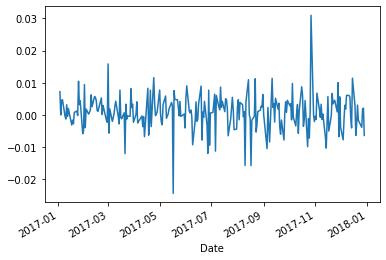

In [10]:
# plot portfolio return trend
StockReturns["Portfolio"].plot()

In [14]:
StockReturns.head(3)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_EW
Date,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.007265,0.007605
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000031,-0.000174
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.004559,0.003374


In [15]:
# portfolio cumulative returns
import matplotlib.pyplot as plt 
CumulativeReturns = ((1 + StockReturns).cumprod() -1)


<AxesSubplot:xlabel='Date'>

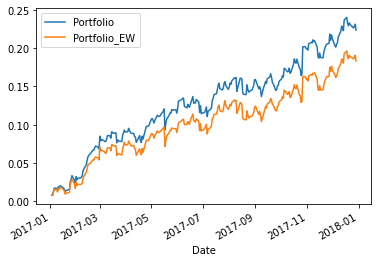

In [16]:
CumulativeReturns[["Portfolio", "Portfolio_EW"]].plot()

In [17]:
# Market-Cap weights
market_cap = np.array([2000, 1500, 1000, 500, 500, 600, 800, 900, 1000])
mcap_weights = market_cap / sum(market_cap)
mcap_weights

array([0.22727273, 0.17045455, 0.11363636, 0.05681818, 0.05681818,
       0.06818182, 0.09090909, 0.10227273, 0.11363636])

In [19]:
# Pearson correlation
correlation_matrix = StockReturns.drop(["Portfolio", "Portfolio_EW"], axis=1).corr()
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.437430  0.055505  0.038432  0.199914  0.509472  0.006766   
MSFT  0.437430  1.000000  0.084108  0.230215  0.191248  0.621096 -0.044827   
XOM   0.055505  0.084108  1.000000  0.121012  0.305926  0.015118  0.193861   
JNJ   0.038432  0.230215  0.121012  1.000000  0.070328  0.052781  0.067930   
JPM   0.199914  0.191248  0.305926  0.070328  1.000000  0.013919  0.257401   
AMZN  0.509472  0.621096  0.015118  0.052781  0.013919  1.000000 -0.092188   
GE    0.006766 -0.044827  0.193861  0.067930  0.257401 -0.092188  1.000000   
FB    0.542367  0.543341 -0.046813  0.079391  0.095245  0.653030 -0.024364   
T     0.005082 -0.021079  0.197576  0.091622  0.252832 -0.017909  0.292706   

            FB         T  
AAPL  0.542367  0.005082  
MSFT  0.543341 -0.021079  
XOM  -0.046813  0.197576  
JNJ   0.079391  0.091622  
JPM   0.095245  0.252832  
AMZN  0.653030 -0.017909  
GE   -0.024364  0.292706  
FB 

In [26]:
# covariance matrix
cov_mat = StockReturns.cov()
print(cov_mat)

              AAPL      MSFT       XOM       JNJ       JPM      AMZN  \
AAPL  1.230004e-04  0.000045  0.000004  0.000003  0.000023  0.000075   
MSFT  4.523795e-05  0.000087  0.000006  0.000015  0.000018  0.000076   
XOM   4.335558e-06  0.000006  0.000050  0.000006  0.000022  0.000001   
JNJ   3.072253e-06  0.000015  0.000006  0.000052  0.000005  0.000005   
JPM   2.268091e-05  0.000018  0.000022  0.000005  0.000105  0.000002   
AMZN  7.462331e-05  0.000076  0.000001  0.000005  0.000002  0.000174   
GE    9.366843e-07 -0.000005  0.000017  0.000006  0.000033 -0.000015   
FB    6.445736e-05  0.000054 -0.000004  0.000006  0.000010  0.000092   
T     6.028459e-07 -0.000002  0.000015  0.000007  0.000028 -0.000003   

                GE        FB             T  
AAPL  9.366843e-07  0.000064  6.028459e-07  
MSFT -5.218049e-06  0.000054 -2.102457e-06  
XOM   1.704432e-05 -0.000004  1.488464e-05  
JNJ   6.112208e-06  0.000006  7.064036e-06  
JPM   3.287008e-05  0.000010  2.766552e-05  
AMZN -1.5

In [27]:
# annalized covariance matrix
cov_mat_annual = cov_mat * 252

In [29]:
# portfolio std 
port_vol = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat, portfolio_weights)))
port_vol 

0.005471207615092258

In [31]:
# Markowitz portfolios
port_sim = pd.read_csv("Data/SharpeRatioPortfolios.csv")
port_sim.head(3)

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185


In [33]:
# MSR : 'maximum sharpe ratio' portfolio
numstocks = 9
risk_free = 0 
port_sim["Sharpe"] = (port_sim["Returns"] - risk_free) / port_sim["Volatility"]
MSR = port_sim.sort_values(by=['Sharpe'], ascending=False)
MSR_weights = MSR.iloc[0, 0:numstocks]
np.array(MSR_weights)

array([0.00755369, 0.00573255, 0.00724446, 0.16672379, 0.38235578,
       0.01794065, 0.0103131 , 0.01125444, 0.39088154])